### HR EMPLOYEE ATTRITION

SANKAR SIVASAMY

DATA ANALYST INTERN

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import missingno as msno

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer



In [2]:
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\Datasets\Hr.csv")

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.shape

(1470, 35)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

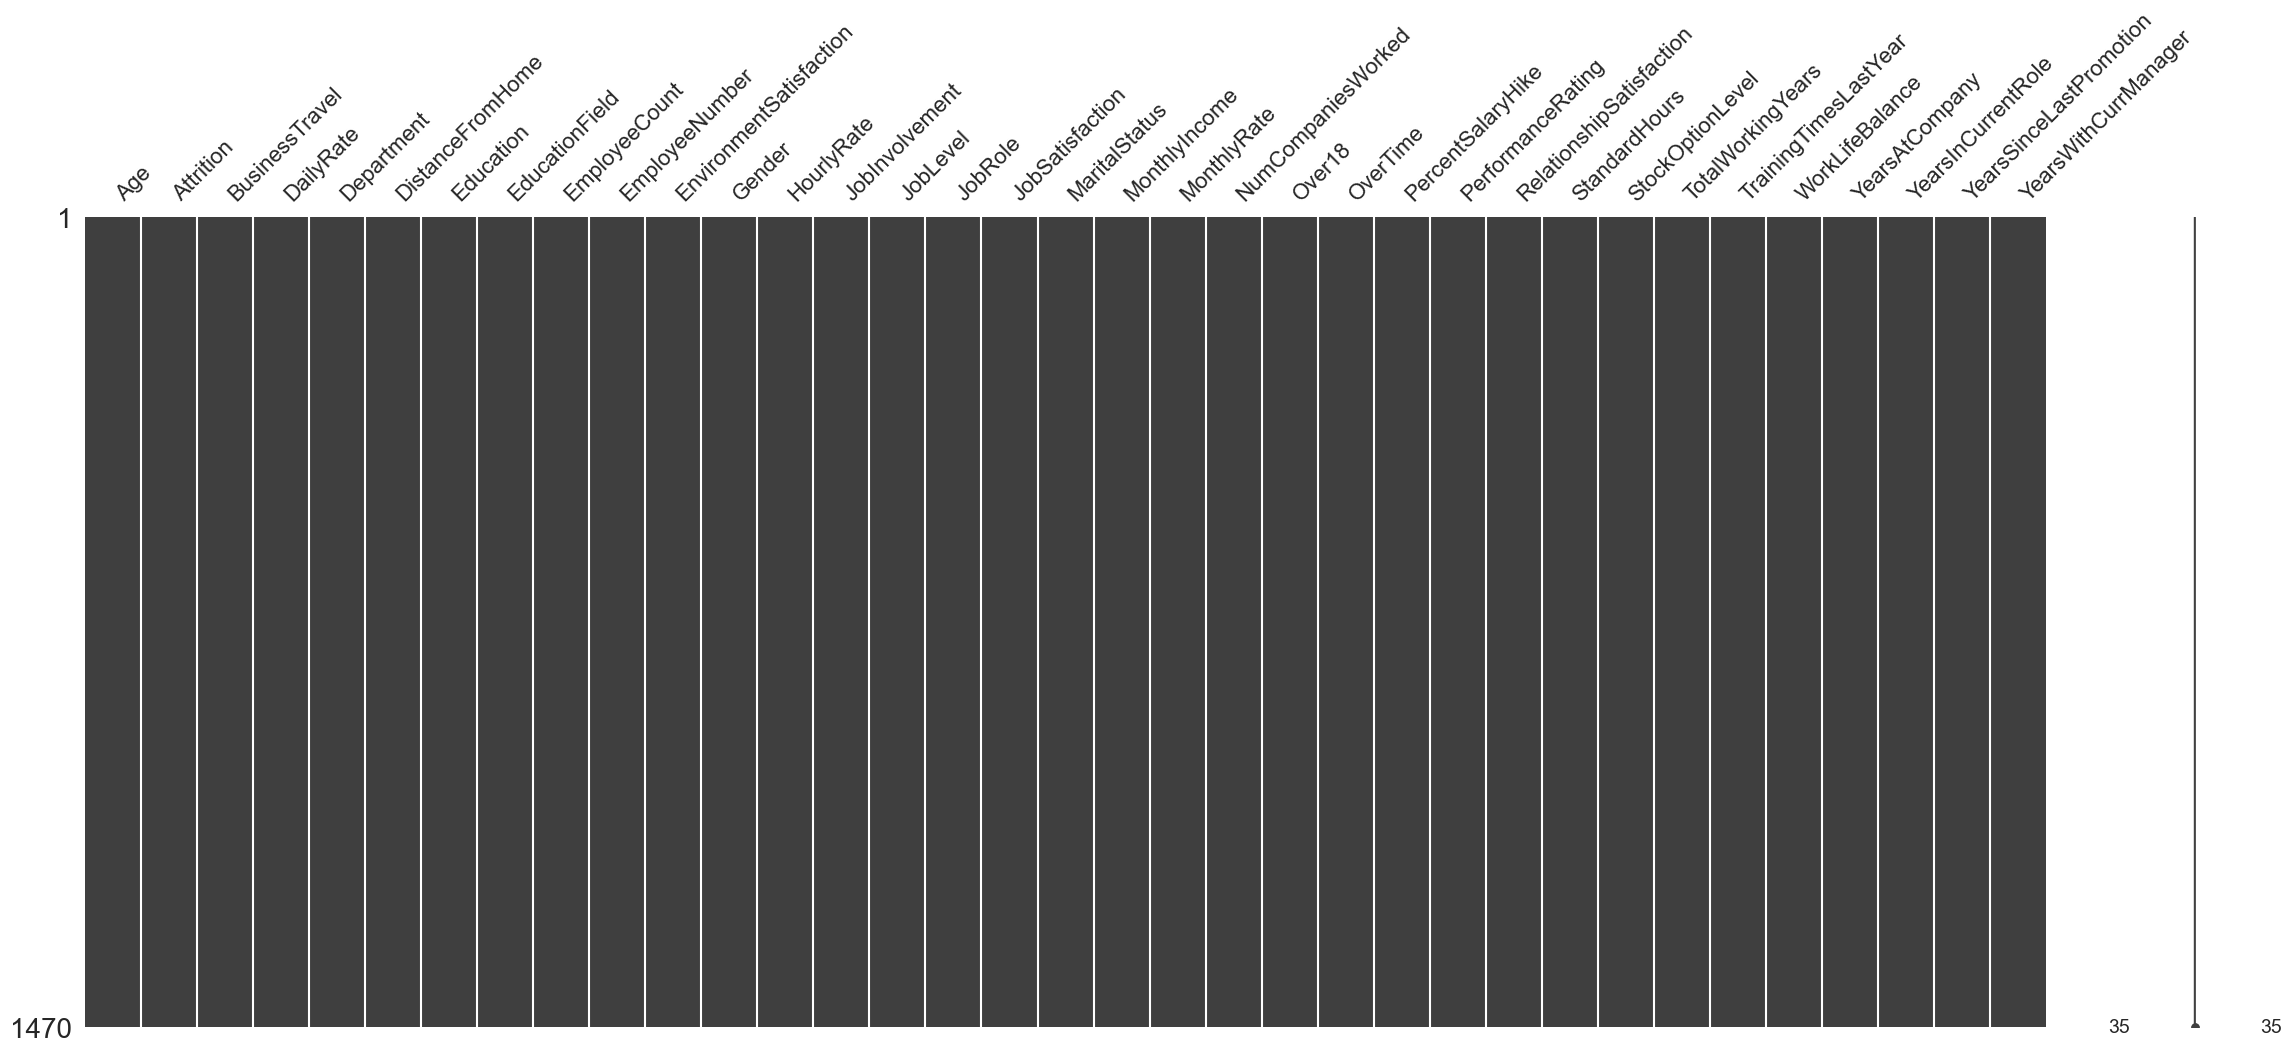

In [9]:
#msno is a library which helps us to visualise our dataset to find any missing values
msno.matrix(df)

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Axes: xlabel='Age', ylabel='Density'>

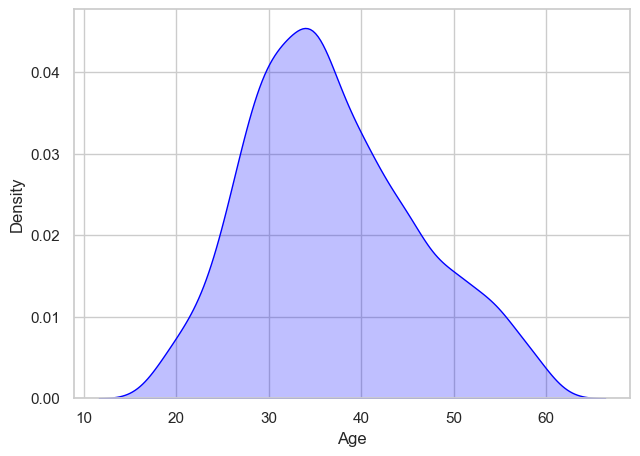

In [11]:
sns.kdeplot(df['Age'],shade=True,color='blue')

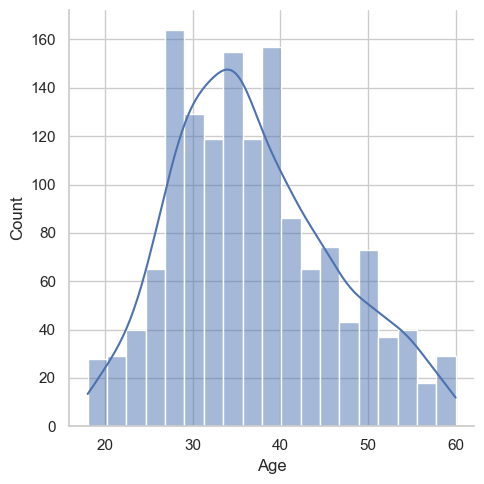

In [12]:
sns.displot(df,x=df["Age"],kde=True)

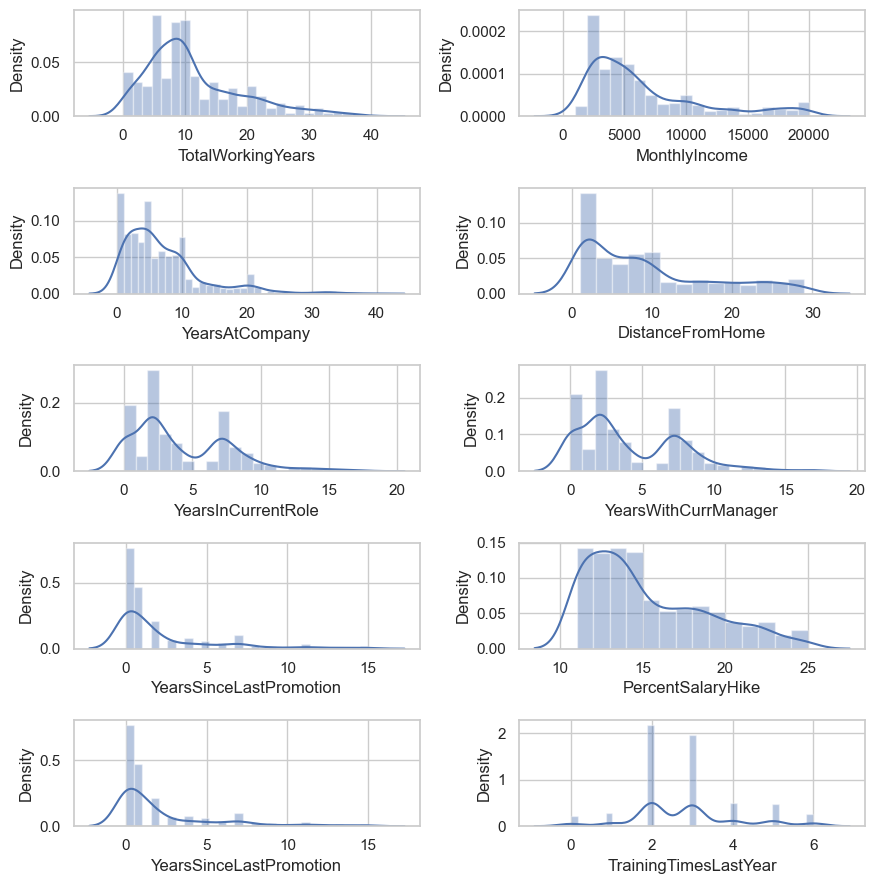

In [13]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

In [14]:
category_df=df.select_dtypes(include='object')

In [15]:
category_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [16]:
sns.set(font_scale=0.8)

In [17]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.catplot(data=df,kind='count',height=3.5,aspect=3,x=attr)
        return
    
    if(attr=='EducationField'):
        sns.set(font_scale=0.6)
        sns.catplot(data=df,kind='count',height=2,aspect=3,x=attr)
        return
    
    sns.catplot(data=df,kind='count',height=3.5, aspect=1.5,x=attr)

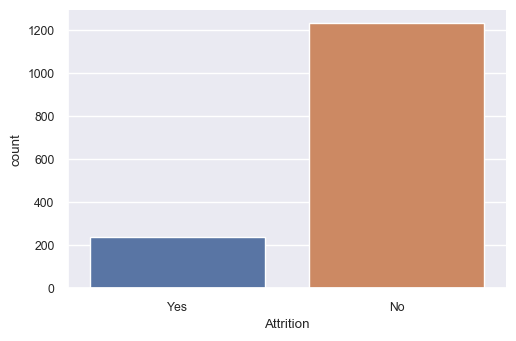

In [18]:
plot_cat('Attrition')  

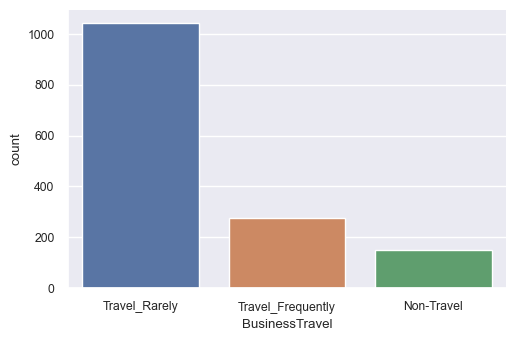

In [19]:
plot_cat('BusinessTravel')   

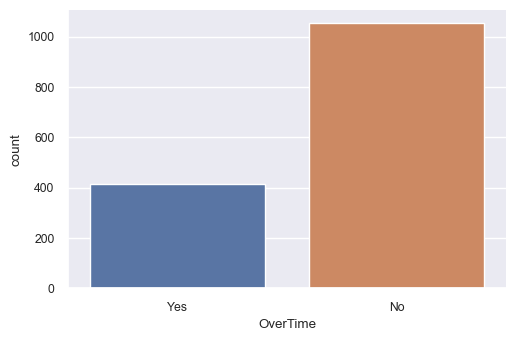

In [20]:
plot_cat('OverTime')

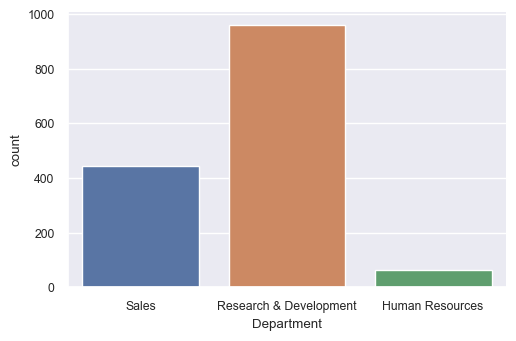

In [21]:
plot_cat('Department')  

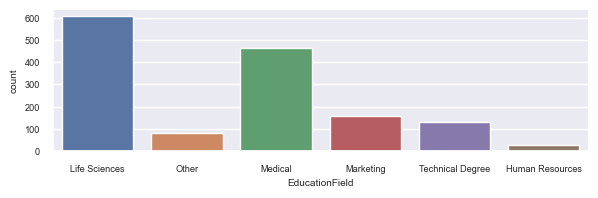

In [22]:
plot_cat('EducationField')

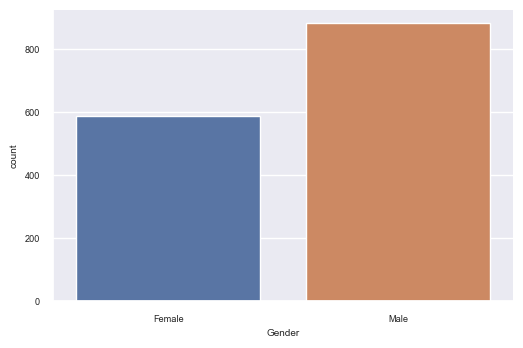

In [23]:
plot_cat('Gender') 

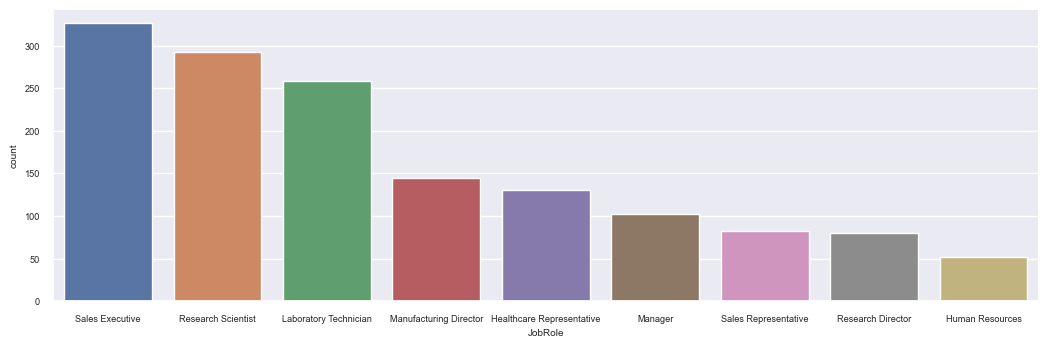

In [24]:
plot_cat('JobRole')

In [25]:
# num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
# for i in num_disc:
#     plot_cat(i)

<Axes: >

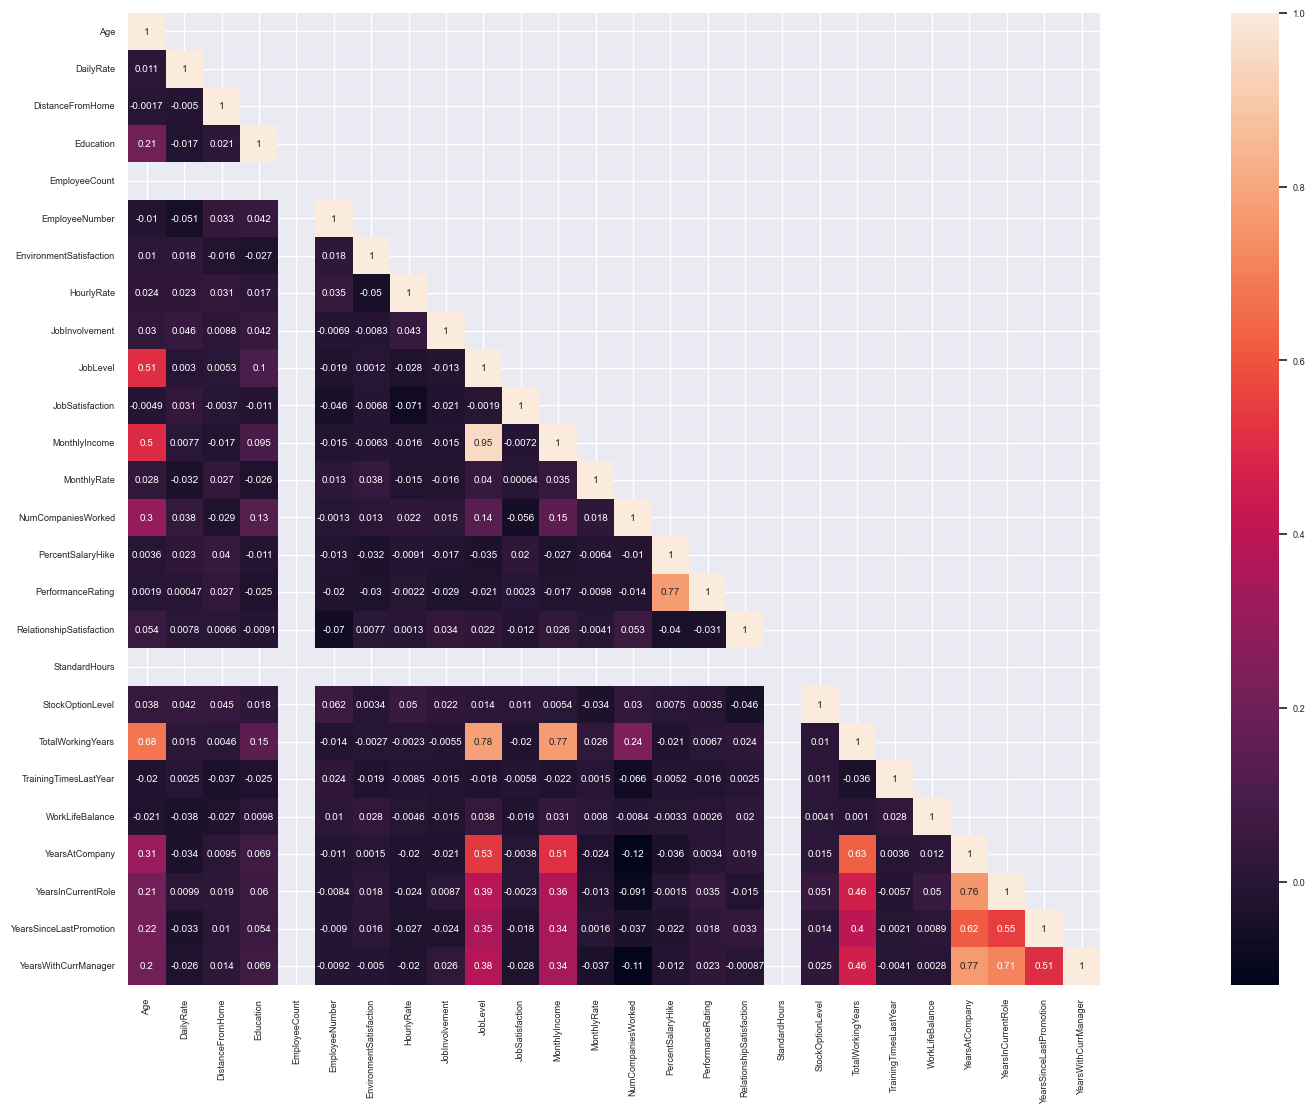

In [26]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
# mask[:] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

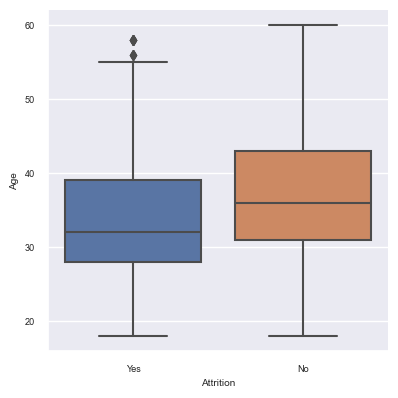

In [27]:
#Featue Selection
sns.catplot(data=df,y='Age',x='Attrition',height=4,aspect=1,kind='box')

In [28]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

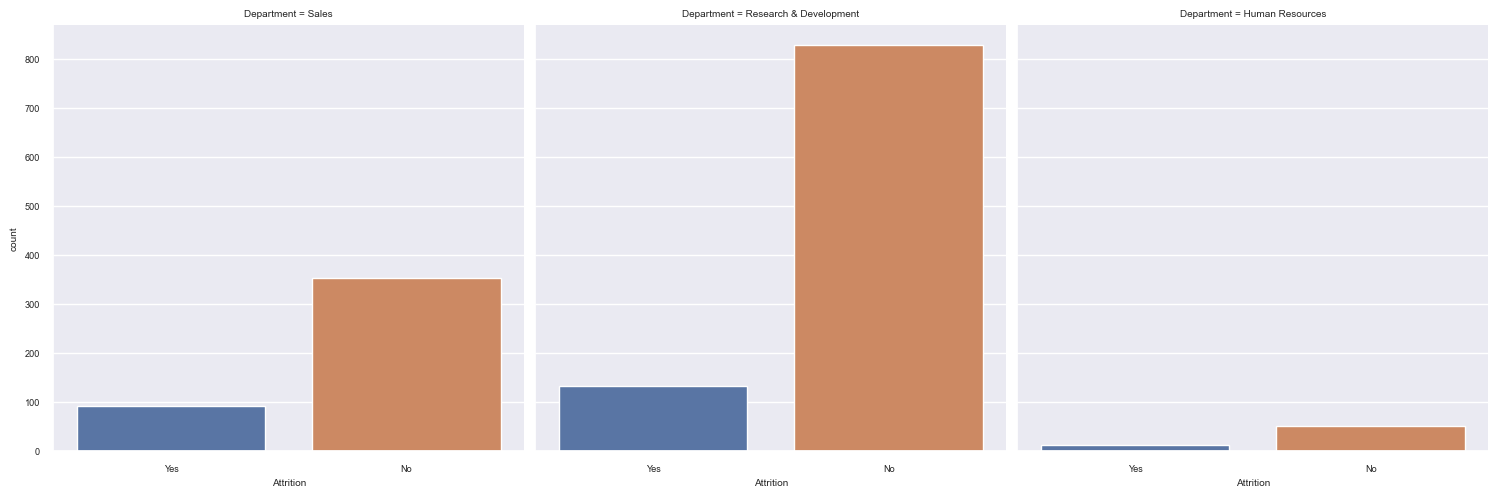

In [29]:
sns.catplot(data=df,kind='count',x='Attrition',col='Department')

In [30]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


In [31]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


In [32]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


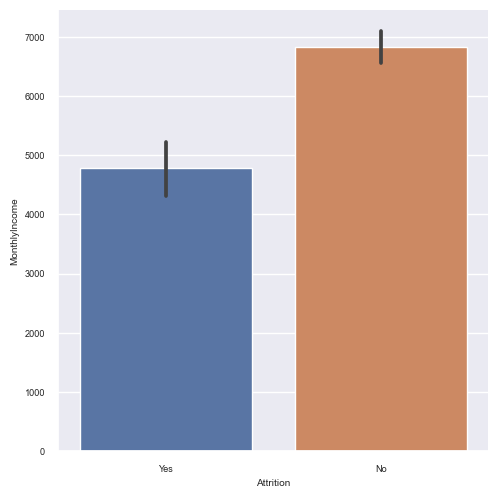

In [33]:
sns.catplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

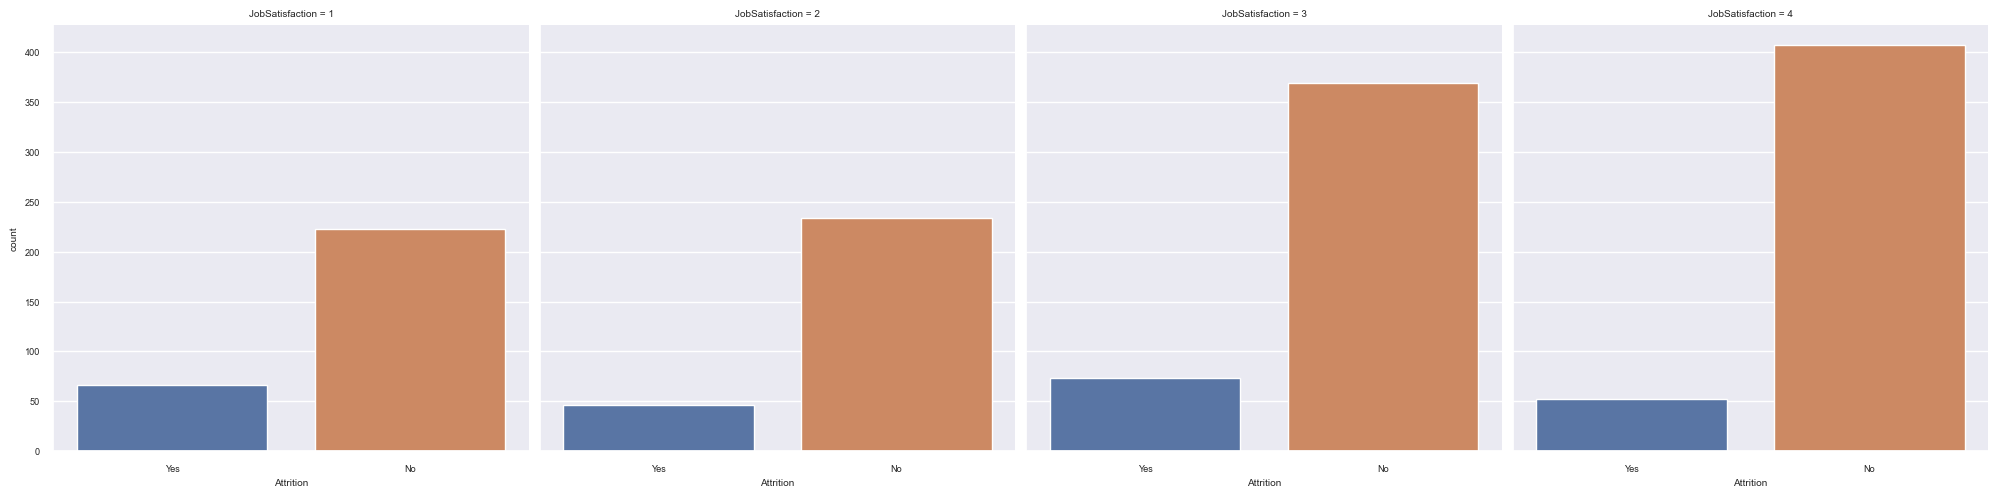

In [34]:
sns.catplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [35]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [36]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [37]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') 

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


In [38]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [39]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


#### Feature Selection

In [40]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

#### Preparing Dataset

Feature Encoding

In [41]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [42]:
category_df=df.select_dtypes(include='object')
category_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [43]:
for col in category_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [44]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


In [45]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].values

In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [47]:
from imblearn.over_sampling import SMOTE

In [51]:
# Instantiate the SMOTE object
oversampler = SMOTE()

# Fit and resample the data
x_train_smote, y_train_smote = oversampler.fit_resample(x_train, y_train)


In [81]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test)) 
    
    cm = confusion_matrix(y_test, pred) # rows = truth, cols = prediction
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (3,3))
    plt.title(f"{clf} Algorithm ",fontsize=12)
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,fmt='g')

,Modelling Algorithm,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.817935,0.4375,0.344262,0.628157
1,RandomForestClassifier,0.853261,0.1875,0.375000,0.630814
2,GradientBoostingClassifier,0.850543,0.3125,0.405405,0.652854


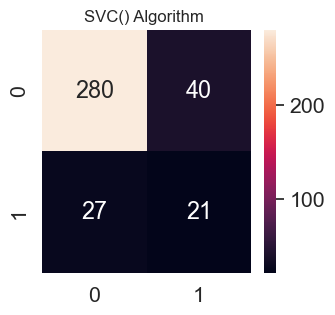

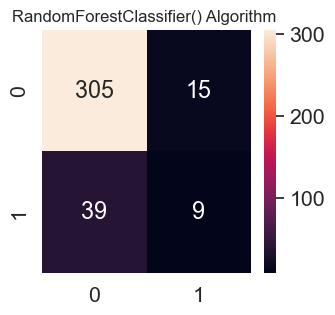

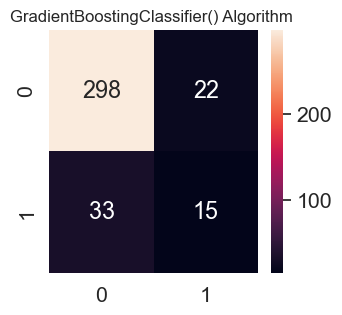

In [82]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algorithm':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

NOw compare different models

In [59]:
def comp_models(met_df,metric):
    sns.catplot(data=met_df,x=metric,y='Modelling Algorithm',height=3,aspect=1.5,kind='bar')
    sns.catplot(data=met_df,y=metric,x='Modelling Algorithm',height = 3,aspect=2,kind='point')

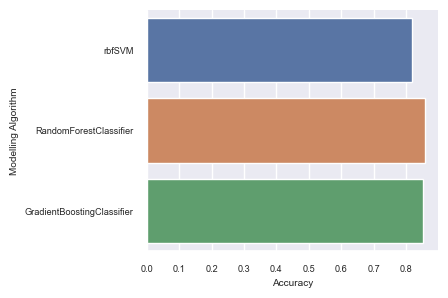

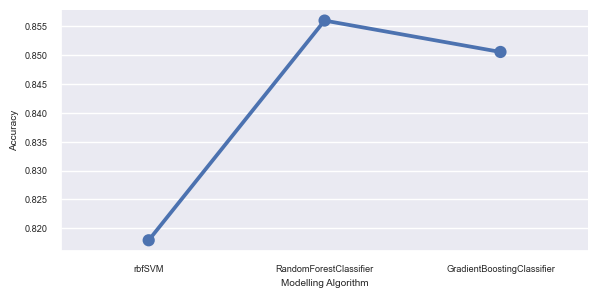

In [60]:
comp_models(met_df,'Accuracy')

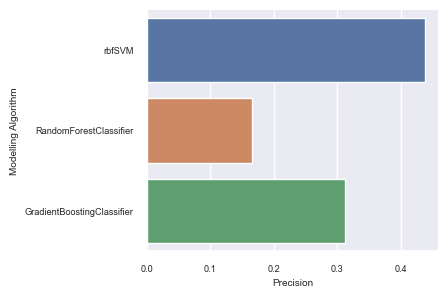

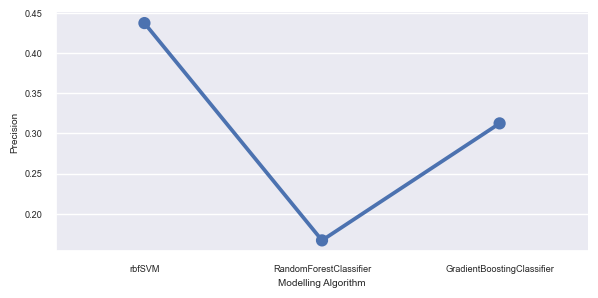

In [61]:
comp_models(met_df,'Precision')

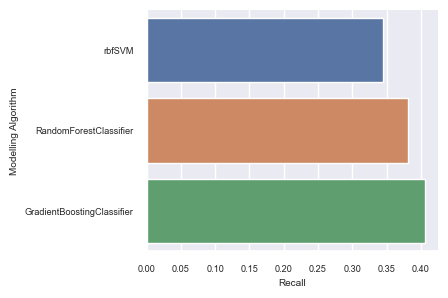

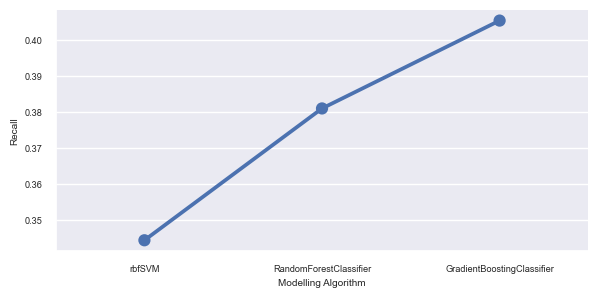

In [62]:
comp_models(met_df,'Recall')

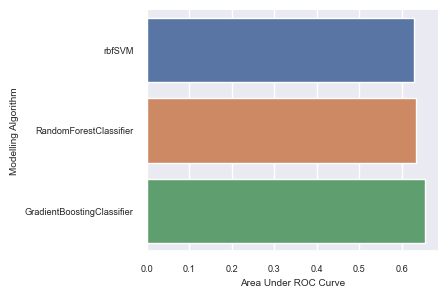

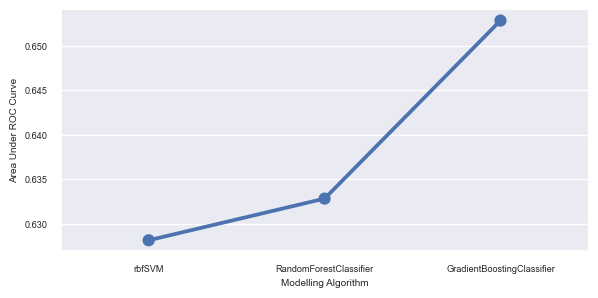

In [63]:
comp_models(met_df,'Area Under ROC Curve')